**Курсовая работа**

Выполнил: студент группы БФИ2203 Козлова Я.В.
Задание:
Написать программу, которая будет считывать данные из CSV файла, содержащего
информацию о продажах товаров в магазине. Данные в файле содержатся в следующем
формате:
| Номер заказа | Дата заказа | Название товара | Категория товара | Количество продаж | Цена
за единицу | Общая стоимость |
Необходимо:
1. Рассчитать общую выручку магазина.
2. Найти товар, который был продан наибольшее количество раз.
3. Найти товар, который принес наибольшую выручку.
4. Составить отчет, содержащий информацию об общей выручке магазина, количестве
проданных единиц каждого товар и доле каждого товара в общей выручке.

Для решения задач необходимо использовать структуры данных, такие как массивы и
хеш-таблицы, а также различные алгоритмы обработки данных, например, сортировку и поиск.
Также необходимо учитывать возможные ошибки ввода-вывода и обрабатывать их в
соответствии с требованиями

In [ ]:
from google.colab import files
import pandas as pd
from matplotlib import pyplot as plt
import csv

uploaded = files.upload()

Saving KR.csv to KR.csv


Реализация хештаблиц:

In [ ]:
class Node:

    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None


class HashTable:

    def __init__(self):

        self.capacity = 27
        self.size = 0
        self.buckets = [None] * self.capacity

    def insert(self, key, value):
        index = hash(key) % self.capacity
        node = self.buckets[index]
        while node:
            if node.key == key:
                node.value = value
                return
            node = node.next
        new_node = Node(key, value)
        new_node.next = self.buckets[index]
        self.buckets[index] = new_node
        self.size += 1
        if self.size > 0.7 * self.capacity:
            self.resize()

    def search(self, key):
        index = hash(key) % self.capacity
        node = self.buckets[index]
        while node:
            if node.key == key:
                return node.value
            node = node.next
        return None

    def remove(self, key):
        index = self._hash(key)

        previous = None
        current = self.table[index]

        while current:
            if current.key == key:
                if previous:
                    previous.next = current.next
                else:
                    self.table[index] = current.next
                self.size -= 1
                return
            previous = current
            current = current.next

        raise KeyError(key)

    def resize(self):
        new_capacity = self.capacity * 2
        new_buckets = [None] * new_capacity
        for i in range(self.capacity):
            node = self.buckets[i]
            while node:
                index = hash(node.key) % new_capacity
                if new_buckets[index]:
                    new_node = new_buckets[index]
                    while new_node.next:
                        new_node = new_node.next
                    new_node.next = Node(node.key, node.value)
                else:
                    new_buckets[index] = Node(node.key, node.value)
                node = node.next
        self.capacity = new_capacity
        self.buckets = new_buckets

    def __len__(self):
        return self.size

    def __contains__(self, key):
        try:
            self.search(key)
            return True
        except KeyError:
            return False

Быстрая сортировка:

In [ ]:
def quick_sort(array):
    if len(array) < 1:
        return array
    else:
        pivot=array.pop()
        low, same, high = [], [pivot], []
        for item in array:
            if item == pivot:
                same.append(item)
            elif item > pivot:
                high.append(item)
            else:
                low.append(item)
        return quick_sort(low) + same + quick_sort(high)

Основная функция для определения необходимых показателей:

In [ ]:
def analysis(arr):
  ht1 = HashTable()
  ht2 = HashTable()
  revenue = 0 # общая выручка
  max_count = 0 # максимальное количество проданного товара
  max_sales = "" # товар проданный максимальное количество раз
  count_row = 0
  name_arr, reven_arr = [], [] # массив для ключей / название товаров и массив для выручки
  for row in arr:
    if count_row != 0:
      revenue += int(row[6])
      if max_count < int(row[4]):
        max_count = int(row[4])
        max_sales = row[2]

      reven_arr.append(int(row[6]))
      name_arr.append(row[2])
      ht2.insert(str(row[6]),row[2]) #в хеш таблицу записываем значение выручки/ключ и товар

      ht1.insert(str(row[2]), row[4]) #добавляем в хэш-таблицу товар/ключ и количество его продаж
      ht1.insert(str(row[2])+ "1", row[6]) #добавляем в хэш-таблицу товар/ключ и его выручку

    count_row += 1

  for item in range(0,len(name_arr) - 1):
   print(f'{name_arr[item]} был продан {ht1.search(name_arr[item])} раз, доля товара от общей выручки (в процентах) составяет {round(int(ht1.search(name_arr[item]+"1"))/revenue*100,2)}%')

  result = quick_sort(reven_arr)

  return revenue, max_sales, ht2.search(str(result[-1]))

table = []
with open('KR.csv', encoding='UTF-8') as file:
    reader = csv.reader(file, delimiter = ";")
    for row in reader:
        table.append(row)

try:
    revenue, max_sales, max_tovar = analysis(table)
    print()
    print(f'Общая выручка магазина: {revenue} рублей')
    print(f'Товар, который был продан наибольшее количество раз: {max_sales}')
    print(f'Товар, который принес наибольшую выручку: {max_tovar}')
except:
    print('Датасет не найден!')



NEYDO WOOD HAZE 01.11 был продан 23 раз, доля товара от общей выручки (в процентах) составяет 2.73%
BIODERMA SENSIBIO был продан 90 раз, доля товара от общей выручки (в процентах) составяет 2.25%
ERBORIAN CC RED CORRECT был продан 50 раз, доля товара от общей выручки (в процентах) составяет 2.03%
ROSE ET MARIUS UNE SIESTE DANS LA BASTIDE ENSOLEILLÉE был продан 19 раз, доля товара от общей выручки (в процентах) составяет 3.51%
VILLERMO ЛАВАНДА был продан 55 раз, доля товара от общей выручки (в процентах) составяет 1.5%
ARAVIA PROFESSIONAL INTENSIVE MOISTURE был продан 90 раз, доля товара от общей выручки (в процентах) составяет 1.37%
3INA THE BLUSH был продан 89 раз, доля товара от общей выручки (в процентах) составяет 2.93%
LA ROCHE-POSAY EFFACLAR был продан 100 раз, доля товара от общей выручки (в процентах) составяет 3.88%
3INA THE LIPSTICK был продан 69 раз, доля товара от общей выручки (в процентах) составяет 1.07%
KEVYN AUCOIN VELVET LIP PAINT был продан 20 раз, доля товара от общ

Вормирование отчетов:

In [ ]:
data = pd.read_csv('KR.csv', sep=';')

revenue = data['Общая стоимость'].sum()
print(f'Общая выручка магазина: {revenue}')

data['Название товара'][data['Количество продаж'] == data['Количество продаж'].max()].values
data['Название товара'][data['Общая стоимость'] == data['Общая стоимость'].max()].values
data['Доля от общей выручки в %'] = data['Общая стоимость'] / (revenue / 100)
data['Доля от общей выручки в %'] = data['Доля от общей выручки в %'].round(2).astype(int)
data.index = data['Название товара']
data[['Количество продаж', 'Общая стоимость', 'Доля от общей выручки в %']]

Общая выручка магазина: 3949249


,Количество продаж,Общая стоимость,Доля от общей выручки в %
Название товара,,,
NEYDO WOOD HAZE 01.11,23,107640,2
BIODERMA SENSIBIO,90,88920,2
ERBORIAN CC RED CORRECT,50,80000,2
ROSE ET MARIUS UNE SIESTE DANS LA BASTIDE ENSOLEILLÉE,19,138700,3
VILLERMO ЛАВАНДА,55,59400,1
ARAVIA PROFESSIONAL INTENSIVE MOISTURE,90,53910,1
3INA THE BLUSH,89,115700,2
LA ROCHE-POSAY EFFACLAR,100,153400,3
3INA THE LIPSTICK,69,42435,1


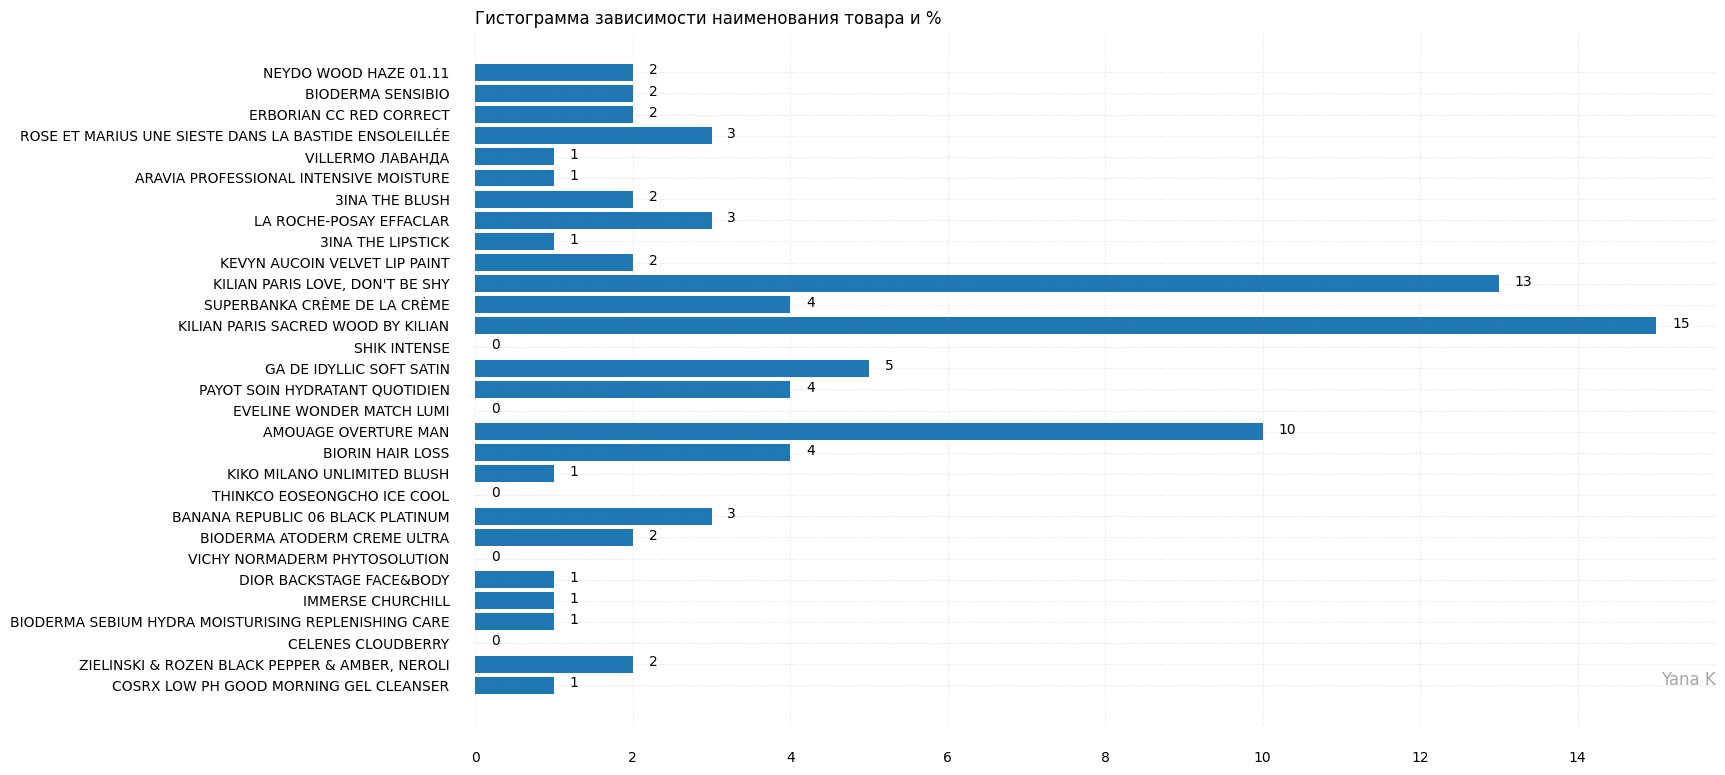

In [ ]:
df = pd.DataFrame(data)
name = df['Название товара'].head(30)
percent = df['Доля от общей выручки в %'].head(30)

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(name, percent)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 15)
ax.yaxis.set_tick_params(pad = 15)

ax.grid(color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='200',
             color ='black')

ax.set_title('Гистограмма зависимости наименования товара и %',
             loc ='left', )

fig.text(0.9, 0.15, 'Yana K', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)

plt.show()
